#Titanic!

The Titanic data is used in the project. This dataset contains demographics and passenger information from 891 of the 2224 passengers and crew on board the Titanic. You can view a description of this dataset on the Kaggle website, where the data was obtained.


Dataset description:

survival:        Survival(0 = No; 1 = Yes)

pclass:          Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)

name:            Name

sex:             Sex

age:             Age

sibsp:           Number of Siblings/Spouses Aboard

parch:           Number of Parents/Children Aboard

ticket:          Ticket Number

fare:            Passenger Fare

cabin:           Cabin

embarked:        Port of Embarkation
                (C = Cherbourg; Q = Queenstown; S = Southampton)

# 1. Questions
What are the factors that made peopel to survive. Three factors will be studied in following report
#### 1. Does gender has effect on the rate of survival.
#### 2. Does age has effect on the rate of survival.
#### 3. Does have at least one sibiling aboard made people to survive.

# 2. What is the independent variable in the experiment?
Gender,
Age,
and whether a passenger has at lease one sibiling

# 3. What is the dependent variable in the experiment?
Rate of survial


# 4. Import libraries



In [75]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import csv
import seaborn as sns

C:\Users\ares han\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:7: FutureWarning: 
The rplot trellis plotting interface is deprecated and will be removed in a future version. We refer to external packages like seaborn for similar but more refined functionality. 

See our docs http://pandas.pydata.org/pandas-docs/stable/visualization.html#rplot for some example how to convert your existing code to these packages.


# 5. Loading file

In [28]:
with open(r'C:\Users\ares han\Documents\Learning\Udacity\Titanic\titanic_data.csv', 'r') as f:
    titanic = pd.read_csv(f)

# 6. Inspect Data

## 6.1 Check table structure.

In [29]:
titanic.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,NaN,S


## 6.2 Check data profile by describe() function

In [30]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


According to the summary above, the value of age is in a reasonable range

## 6.3 Check how many rows in dataframe

In [31]:
len(titanic)

891

## 6.4 Check if there are duplicates in PassengerId

In [32]:
titanic['PassengerId'].duplicated().sum()

0

## 6.5 Determine NaN values in each column, there are NaN values in column 'Age', 'Cabin' and 'Embarked'

In [33]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

There are NaN values in column Age which we will use to answer our question.

## 6.6 Check unique value for column 'Survived'. The reuslt looks good.

In [34]:
titanic['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

## 6.7 Check unique value for column 'SibSp'. The reuslt looks good.

In [35]:
titanic['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

# 7.  Create individual dataset for each question and drop missing data  

## 7.1 Create a dataset for investigating effect of Age

In [36]:
titanic_age = titanic[['PassengerId','Survived','Age']].copy()
titanic_age.head(1)

,PassengerId,Survived,Age
0,1,0,22


In [37]:
len(titanic_age)

891

### 7.1.1 Check Age distribution

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000001F77F978>]], dtype=object)

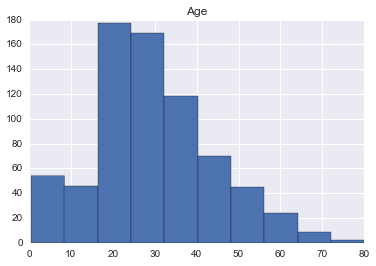

In [38]:
titanic_age[['Age']].hist()

### 7.1.2 Drop rows with NaN Value for Age

In [39]:
titanic_age = titanic_age[titanic_age.Age.notnull()]
len(titanic_age)

714

177 rows were dropped

### 7.1.3 Check age distribution by looking at a box plot grouped by survived

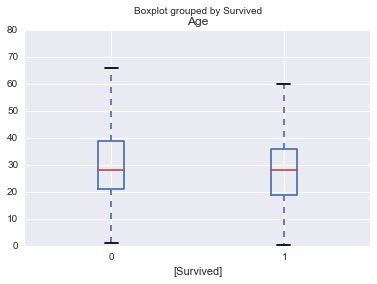

In [40]:
titanic_age[['Survived','Age']].boxplot(by = 'Survived')


### 7.1.2 Add a new column Age_Group to mark people who under 18(not include), between 18 and 60, and beyond 60(not include)

In [41]:
titanic_age['Age_Group'] = titanic_age.apply(lambda r: 'Children' if r.Age<18 else 'Adult' if (r.Age >= 18)&(r.Age<=60) else 'Elder', axis = 'columns')

titanic_age.head()

,PassengerId,Survived,Age,Age_Group
0,1,0,22,Adult
1,2,1,38,Adult
2,3,1,26,Adult
3,4,1,35,Adult
4,5,0,35,Adult


## 7.2 Create a dataset for investigating effect of Sex

In [42]:
titanic_sex = titanic[['PassengerId','Survived','Sex']].copy()
titanic_sex.head(1)

,PassengerId,Survived,Sex
0,1,0,male


Accoridng to output of step 'Inspect Data', there is no NaN value in column 'Sex'. So we done't need to drop any rows.

## 7.3 Create a dataset for investigating effect of whether has siblings

In [43]:
titanic_sibSp = titanic[['PassengerId','Survived','SibSp']].copy()
titanic_sibSp.head(1)

,PassengerId,Survived,SibSp
0,1,0,1


### 7.3.1 Add a new column to mark passenger who has at least one sibling aboard

In [44]:
titanic_sibSp['Has_SibSp'] = titanic_sibSp.apply(lambda r: 'Has_SibSp' if r.SibSp >= 1 else 'No_SibSp', axis = 'columns')

titanic_sibSp.head(1)

,PassengerId,Survived,SibSp,Has_SibSp
0,1,0,1,Has_SibSp


# 8. Calculate rate of Survival

## 8.1 Define a function to calculate survivved rate

In [45]:
def calculate_survived_rate(survived_rate,source_data,groupby_column):
    survived_rate['Survived'] = source_data.groupby(groupby_column).sum()['Survived']
    survived_rate['Passenger'] = source_data.groupby(groupby_column).count()['PassengerId']
    survived_rate.at['Total','Passenger'] = len(source_data)
    survived_rate.at['Total','Survived'] = source_data['Survived'].sum()
    survived_rate['Survived_Rate']= survived_rate.apply(lambda r: 100*float(r.Survived)/r.Passenger, axis = 'columns')
    return survived_rate

## 8.2 Calculate survived rate by age

In [46]:
survived_rate_age = pd.DataFrame(0,index= ['Children','Adult','Elder','Total'],columns=['Passenger','Survived','Survived_Rate'])
survived_rate_age = calculate_survived_rate(survived_rate_age,titanic_age,'Age_Group')
survived_rate_age

,Passenger,Survived,Survived_Rate
Children,113,61,53.982301
Adult,579,224,38.687392
Elder,22,5,22.727273
Total,714,290,40.616246


## 8.3 Calculate survived rate by sex

In [47]:
survived_rate_sex = pd.DataFrame(0,index= ['male','female','Total'],columns=['Passenger','Survived','Survived_Rate'])
survived_rate_sex = calculate_survived_rate(survived_rate_sex,titanic_sex,'Sex')
survived_rate_sex

,Passenger,Survived,Survived_Rate
male,577,109,18.890815
female,314,233,74.203822
Total,891,342,38.383838


## 8.4 Calculate survived rate by has_sibilings

In [48]:
titanic_sibSp
survived_rate_sibSp = pd.DataFrame(0,index= ['Has_SibSp','No_SibSp','Total'],columns=['Passenger','Survived','Survived_Rate'])
survived_rate_sibSp = calculate_survived_rate(survived_rate_sibSp,titanic_sibSp,'Has_SibSp')
survived_rate_sibSp

,Passenger,Survived,Survived_Rate
Has_SibSp,283,132,46.643110
No_SibSp,608,210,34.539474
Total,891,342,38.383838


# 9. Draw plot to compare survived rate

## 9.1 Draw bar chart for survived rate by age

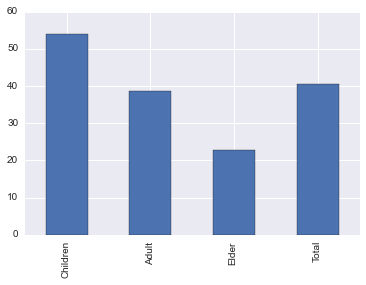

In [49]:
survived_rate_age['Survived_Rate'].transpose().plot(kind='bar')

In [86]:
titanic_age.head(1)

,PassengerId,Survived,Age,Age_Group
0,1,0,22,Adult


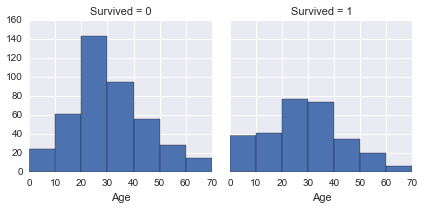

In [91]:
bins = np.arange(0,80, 10)
g = sns.FacetGrid(titanic_age[['Age','Survived']], col="Survived")
g.map(plt.hist, "Age",bins=bins)

In [108]:
y = range(81)
type(y)


list

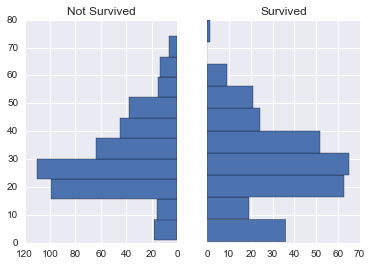

In [123]:
y = range(81)
fig, axes = plt.subplots(ncols=2, sharey=True)
axes[0].hist(list(titanic_age[['Age','Survived']].groupby('Survived').get_group(0)['Age'].values),bins = 10 , orientation ='horizontal')
axes[0].set_title('Not Survived')
axes[1].hist(list(titanic_age[['Age','Survived']].groupby('Survived').get_group(1)['Age'].values),bins = 10 , orientation ='horizontal',label='Survived'  )
axes[1].set_title('Survived')
axes[0].invert_xaxis()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000000021683A20>], dtype=object)

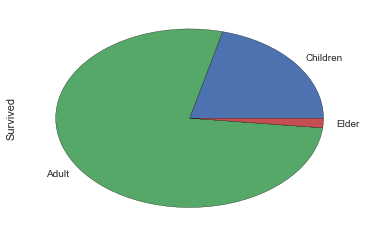

In [73]:
survived_rate_age[0:3]['Survived'].plot(kind='pie', subplots=True)

Accoridng to the bar chart above, the factor age has an effect on survived rate

## 9.2 Draw charts for survived rate by sex¶

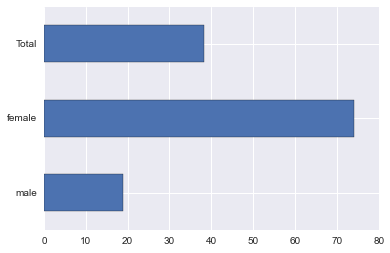

In [52]:
survived_rate_sex['Survived_Rate'].transpose().plot(kind='barh')

In [54]:
survived_rate_sex

,Passenger,Survived,Survived_Rate
male,577,109,18.890815
female,314,233,74.203822
Total,891,342,38.383838


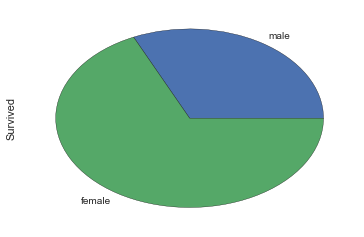

In [74]:
survived_rate_sex[0:2]['Survived'].transpose().plot(kind='pie')

Accoridng to the bar chart above, the factor sex has an effect on survived rate

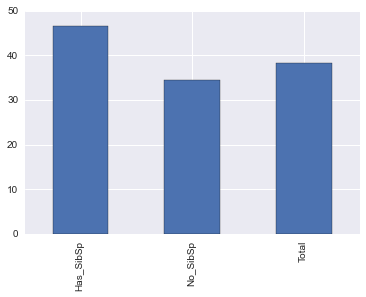

In [51]:
survived_rate_sibSp['Survived_Rate'].transpose().plot(kind='bar')

Accoridng to the bar chart above, it's hard to tell if has at least sibiling aboard really made people to survive.

# 10. Conclusion

##  10.1 Does gender has effect on the rate of survival.
Gender/sex has effect on the rate of survival.
##  10.2. Does age has effect on the rate of survival.
Age has effect on the rate of survival.
##  10.3. Does have at least one sibiling aboard made people to survive.
Passenger who at least one sibiling aboard may have effect on the rate of survival. However, the differences of survival rate between passsenger who has at least one sibiling aboard and passenger who doesn't have sibiling on aboard don't seem to be significant.

# 11. Reference

## 11.1 The dataset 'Titanic' was obtained from website 'Kaggle'